<a href="https://colab.research.google.com/github/isabeleoliveira20/analise-desemprego-2025/blob/main/Taxa_desocupa%C3%A7%C3%A3o_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [155]:
#ler os dados
Base_Dados = pd.read_csv('taxa-desocupacao-2025.csv',
                         sep=',',
                         decimal='.',
                         skiprows=4)

#verificar dimensão
Base_Dados.shape

(18, 6)

In [188]:
Base_Dados.head()

,Regiões,Total,Menos de 1 mês,De 1 mês a menos de 1 ano,De 1 ano a menos de 2 anos,2 anos ou mais
0,Brasil,6045,1127.0,3073.0,666.0,1179.0
1,Norte,542,129.0,267.0,54.0,92.0
2,Nordeste,1985,465.0,920.0,193.0,406.0
3,Sudeste,2529,371.0,1326.0,314.0,518.0
4,Sul,583,95.0,341.0,51.0,96.0


In [193]:
# Converter a coluna 'Total' para número e transformar erros em NaN
Base_Dados['Total'] = pd.to_numeric(Base_Dados['Total'], errors='coerce')

# Remover linhas que viraram NaN (como 'Significado')
Base_Dados = Base_Dados.dropna(subset=['Total'])


In [194]:
#Renomear
Base_Dados.rename(columns={
    'Brasil e Grande Região' : 'Regiões',
}, inplace=True)

In [195]:
#tipos de dados
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Regiões                     6 non-null      object 
 1   Total                       6 non-null      float64
 2   Menos de 1 mês              6 non-null      float64
 3   De 1 mês a menos de 1 ano   6 non-null      float64
 4   De 1 ano a menos de 2 anos  6 non-null      float64
 5   2 anos ou mais              6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 336.0+ bytes


In [198]:
#retiro brasil da tabela para que posteriormente seja mostrado o cálculo certo das regiões
Tabela_Regioes = Base_Dados[Base_Dados['Regiões'] != 'Brasil']
Desemprego_por_regiao = Tabela_Regioes.set_index('Regiões')['Total']


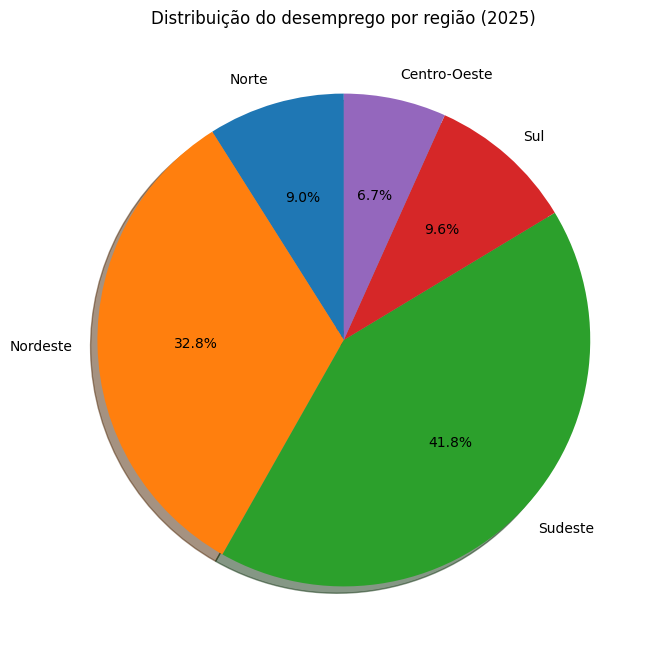

In [199]:
#demonstração em gráfico pizza
plt.figure(figsize=(8,8))
plt.title('Distribuição do desemprego por região (2025)')
plt.pie(
    Desemprego_por_regiao,
    labels=Desemprego_por_regiao.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.show()


In [200]:
Tabela_Regioes.describe()


,Total,Menos de 1 mês,De 1 mês a menos de 1 ano,De 1 ano a menos de 2 anos,2 anos ou mais
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1209.000000,225.400000,614.600000,133.000000,235.800000
std,978.027351,180.274236,487.734867,118.031775,210.547382
min,406.000000,67.000000,219.000000,51.000000,67.000000
25%,542.000000,95.000000,267.000000,53.000000,92.000000
50%,583.000000,129.000000,341.000000,54.000000,96.000000
75%,1985.000000,371.000000,920.000000,193.000000,406.000000
max,2529.000000,465.000000,1326.000000,314.000000,518.000000


In [203]:
#demonstração de região com menor número de desempregados
Tabela_Regioes.loc[Tabela_Regioes['Total'].idxmin()]


,5
Regiões,Centro-Oeste
Total,406.0
Menos de 1 mês,67.0
De 1 mês a menos de 1 ano,219.0
De 1 ano a menos de 2 anos,53.0
2 anos ou mais,67.0


In [208]:
regiao_minima = Tabela_Regioes.loc[Tabela_Regioes['Total'].idxmin()]


In [213]:
categorias_min = ['Menos de 1 mês',
              'De 1 mês a < 1 ano',
              'De 1 a < 2 anos',
              '2 anos ou mais']

valores_min = [regiao_minima['Menos de 1 mês'],
           regiao_minima['De 1 mês a menos de 1 ano'],
           regiao_minima['De 1 ano a menos de 2 anos'],
           regiao_minima['2 anos ou mais']]


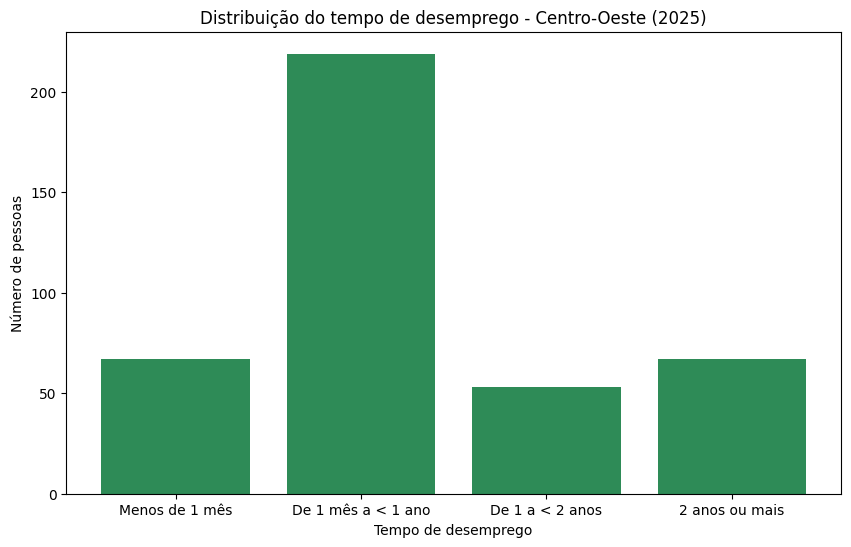

In [215]:
plt.figure(figsize=(10,6))
plt.bar(categorias_min, valores_min, color='seagreen')
plt.title(f'Distribuição do tempo de desemprego - {regiao_minima["Regiões"]} (2025)')
plt.xlabel('Tempo de desemprego')
plt.ylabel('Número de pessoas')
plt.show()


In [211]:
#demonstração de região com maior número de desempregados
Tabela_Regioes.loc[Tabela_Regioes['Total'].idxmax()]

,3
Regiões,Sudeste
Total,2529.0
Menos de 1 mês,371.0
De 1 mês a menos de 1 ano,1326.0
De 1 ano a menos de 2 anos,314.0
2 anos ou mais,518.0


In [217]:
regiao_maxima = Tabela_Regioes.loc[Tabela_Regioes['Total'].idxmax()]

In [218]:
categorias_max = ['Menos de 1 mês',
              'De 1 mês a < 1 ano',
              'De 1 a < 2 anos',
              '2 anos ou mais']

valores_max = [regiao_maxima['Menos de 1 mês'],
           regiao_maxima['De 1 mês a menos de 1 ano'],
           regiao_maxima['De 1 ano a menos de 2 anos'],
           regiao_maxima['2 anos ou mais']]


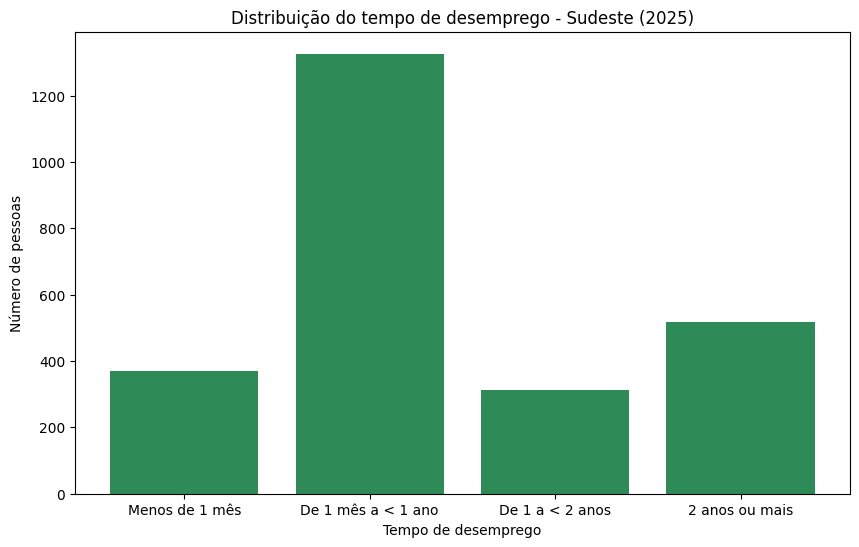

In [220]:
plt.figure(figsize=(10,6))
plt.bar(categorias_max, valores_max, color='seagreen')
plt.title(f'Distribuição do tempo de desemprego - {regiao_maxima["Regiões"]} (2025)')
plt.xlabel('Tempo de desemprego')
plt.ylabel('Número de pessoas')
plt.show()

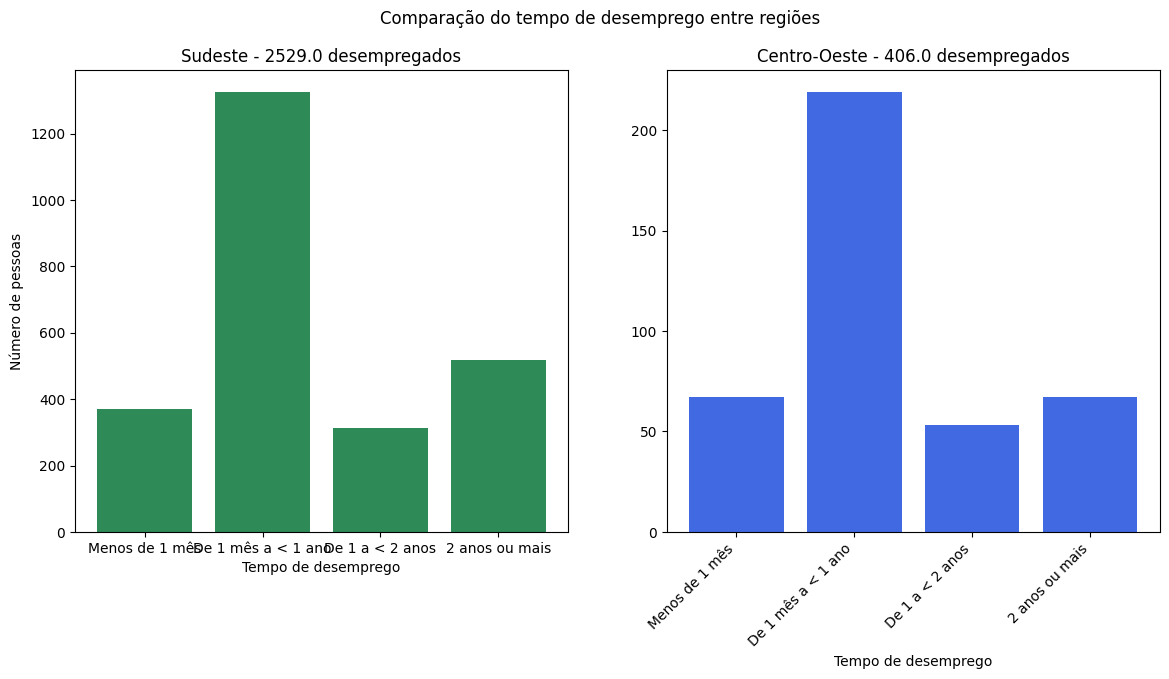

In [226]:
#comparação entre as duas regiões
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Sudeste
axes[0].bar(categorias_max, valores_max, color='seagreen')
axes[0].set_title(f'Sudeste - {regiao_maxima["Total"]} desempregados')
axes[0].set
axes[0].set_xlabel('Tempo de desemprego')
axes[0].set_ylabel('Número de pessoas')
plt.xticks ( rotation=45, ha='right' )

# Região mínima
categorias_min = ['Menos de 1 mês','De 1 mês a < 1 ano','De 1 a < 2 anos','2 anos ou mais']
valores_min = [regiao_minima['Menos de 1 mês'],
               regiao_minima['De 1 mês a menos de 1 ano'],
               regiao_minima['De 1 ano a menos de 2 anos'],
               regiao_minima['2 anos ou mais']]

axes[1].bar(categorias_min, valores_min, color='royalblue')
axes[1].set_title(f'{regiao_minima["Regiões"]} - {regiao_minima["Total"]} desempregados')
axes[1].set_xlabel('Tempo de desemprego')

plt.suptitle('Comparação do tempo de desemprego entre regiões')
plt.xticks ( rotation=45, ha='right' )
plt.show()



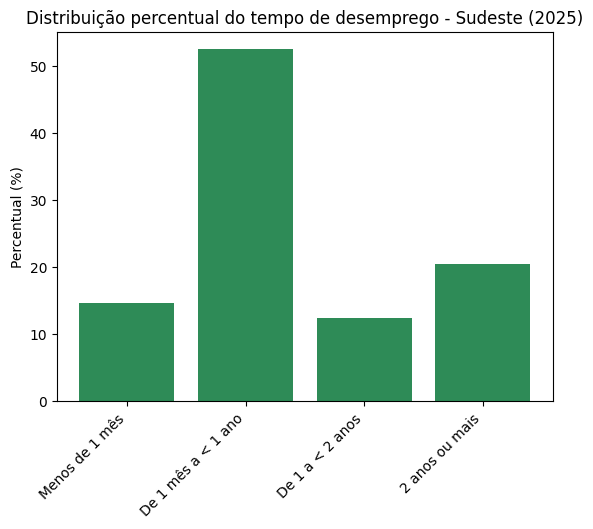

In [224]:
#percentual de tempo de desemprego
valores_percentuais = [v / regiao_maxima['Total'] * 100 for v in valores_max]

plt.bar(categorias_max, valores_percentuais, color='seagreen')
plt.title('Distribuição percentual do tempo de desemprego - Sudeste (2025)')
plt.ylabel('Percentual (%)')
plt.xticks ( rotation=45, ha='right' )
plt.show()
